## 1. Importer les Bibs

In [63]:
import pandas as pd
import numpy as np
import re
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Configuration de l'affichage
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 100)

# Style pour les graphiques
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

## 2. Chargement des Données Brutes

In [64]:
df_raw = pd.read_csv('dataset_maladies_animales_selenium_final.csv')

print(f"📁 Nombre total de lignes: {len(df_raw)}")
print(f"📊 Nombre de colonnes: {len(df_raw.columns)}")
print(f"\n📋 Colonnes disponibles:\n{list(df_raw.columns)}")

📁 Nombre total de lignes: 50
📊 Nombre de colonnes: 16

📋 Colonnes disponibles:
['code', 'url', 'titre', 'contenu', 'langue', 'nb_caracteres', 'nb_mots', 'date_publication', 'lieu', 'maladie', 'source', 'resume_50', 'resume_100', 'resume_150', 'entites_nommees', 'status']


In [65]:
df_raw.head()

,code,url,titre,contenu,langue,nb_caracteres,nb_mots,date_publication,lieu,maladie,source,resume_50,resume_100,resume_150,entites_nommees,status
0,code1050,https://www.elkhabar.com/societe/%D8%A7%D9%84%D8%A8%D9%84%D9%8A%D8%AF%D8%A9-%D9%85%D8%B1%D8%B6-%...,البليدة: مرض غريب يقضي على الأبقار,الخبر 18/06/2024 - 11:41 البليدة: مرض غريب يقضي على الأبقار عاش مربو الأبقار الحلوب بوجه خاص، با...,arabe,952,161,18/06/2024,non spécifié,non identifié,autre,الخبر 18/06/2024 - 11:41 البليدة: مرض غريب يقضي على الأبقار عاش مربو الأبقار الحلوب بوجه خاص، با...,الخبر 18/06/2024 - 11:41 البليدة: مرض غريب يقضي على الأبقار عاش مربو الأبقار الحلوب بوجه خاص، با...,الخبر 18/06/2024 - 11:41 البليدة: مرض غريب يقضي على الأبقار عاش مربو الأبقار الحلوب بوجه خاص، با...,أبقار,succès
1,code1051,https://www.mystateline.com/news/local-news/west-nile-virus-detected-in-winnebago-county/,Access to this page has been denied,Your browser appears to have Javascript disabled. For instructions on how to enable Javascript p...,anglais,191,28,non trouvé,non spécifié,non identifié,médias,Your browser appears to have Javascript disabled. For instructions on how to enable Javascript p...,Your browser appears to have Javascript disabled. For instructions on how to enable Javascript p...,Your browser appears to have Javascript disabled. For instructions on how to enable Javascript p...,aucune,succès
2,code1052,https://www.wattagnet.com/poultry-meat/diseases-health/avian-influenza/article/15677890/more-min...,More Minnesota turkeys struck by avian influenza,BROILERS & TURKEYS DISEASES & HEALTH AVIAN INFLUENZA More Minnesota turkeys struck by avian infl...,anglais,2474,406,non trouvé,non spécifié,rage,autre,BROILERS & TURKEYS DISEASES & HEALTH AVIAN INFLUENZA More Minnesota turkeys struck by avian infl...,BROILERS & TURKEYS DISEASES & HEALTH AVIAN INFLUENZA More Minnesota turkeys struck by avian infl...,BROILERS & TURKEYS DISEASES & HEALTH AVIAN INFLUENZA More Minnesota turkeys struck by avian infl...,poultry; WOAH says AVIAN,succès
3,code1053,https://thehorse.com/1128529/2-california-horses-positive-for-ehm/,2 California Horses Positive for EHM,"Skip to content 2 California Horses Positive for EHM June 18, 2024 Posted by Edited Press Releas...",anglais,9257,1372,18-06-2024,France,non identifié,autre,"Skip to content 2 California Horses Positive for EHM June 18, 2024 Posted by Edited Press Releas...","Skip to content 2 California Horses Positive for EHM June 18, 2024 Posted by Edited Press Releas...","Skip to content 2 California Horses Positive for EHM June 18, 2024 Posted by Edited Press Releas...",equipment of people who have recently had; horse,succès
4,code1054,https://urls.fr/BRHFco,نفوق الأبقار في عمروسة .. المفتش البيطري بالبليدة يكشف السبب,الوطني نفوق الأبقار في عمروسة .. المفتش البيطري بالبليدة يكشف السبب بقلم م. فيصل نشر في 19 جوان ...,arabe,1190,196,19-06-2024,non spécifié,non identifié,autre,الوطني نفوق الأبقار في عمروسة .. المفتش البيطري بالبليدة يكشف السبب بقلم م. فيصل نشر في 19 جوان ...,الوطني نفوق الأبقار في عمروسة .. المفتش البيطري بالبليدة يكشف السبب بقلم م. فيصل نشر في 19 جوان ...,الوطني نفوق الأبقار في عمروسة .. المفتش البيطري بالبليدة يكشف السبب بقلم م. فيصل نشر في 19 جوان ...,أبقار,succès


In [66]:
print("INFORMATIONS GÉNÉRALES")
df_raw.info()

INFORMATIONS GÉNÉRALES
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   code              50 non-null     object
 1   url               50 non-null     object
 2   titre             47 non-null     object
 3   contenu           49 non-null     object
 4   langue            49 non-null     object
 5   nb_caracteres     50 non-null     int64 
 6   nb_mots           50 non-null     int64 
 7   date_publication  49 non-null     object
 8   lieu              49 non-null     object
 9   maladie           49 non-null     object
 10  source            49 non-null     object
 11  resume_50         49 non-null     object
 12  resume_100        49 non-null     object
 13  resume_150        49 non-null     object
 14  entites_nommees   49 non-null     object
 15  status            50 non-null     object
dtypes: int64(2), object(14)
memory usage: 6.4

In [67]:
print("STATISTIQUES DESCRIPTIVES")
df_raw.describe()

STATISTIQUES DESCRIPTIVES


,nb_caracteres,nb_mots
count,50.000000,50.000000
mean,2694.640000,432.600000
std,2922.079667,445.627464
min,0.000000,0.000000
25%,964.500000,159.500000
50%,1938.000000,316.000000
75%,3203.750000,551.250000
max,12295.000000,1841.000000


## 3.1 Vérification des Valeurs Manquantes

In [68]:
# Calculer le pourcentage de valeurs manquantes
missing_data = pd.DataFrame({
    'Colonne': df_raw.columns,
    'Valeurs_Manquantes': df_raw.isnull().sum(),
    'Pourcentage': (df_raw.isnull().sum() / len(df_raw) * 100).round(2)
})

missing_data = missing_data[missing_data['Valeurs_Manquantes'] > 0].sort_values(
    'Pourcentage', ascending=False
)

print("\n🔍 ANALYSE DES VALEURS MANQUANTES:")
print(missing_data.to_string(index=False))


🔍 ANALYSE DES VALEURS MANQUANTES:
         Colonne  Valeurs_Manquantes  Pourcentage
           titre                   3          6.0
         contenu                   1          2.0
          langue                   1          2.0
date_publication                   1          2.0
            lieu                   1          2.0
         maladie                   1          2.0
          source                   1          2.0
       resume_50                   1          2.0
      resume_100                   1          2.0
      resume_150                   1          2.0
 entites_nommees                   1          2.0


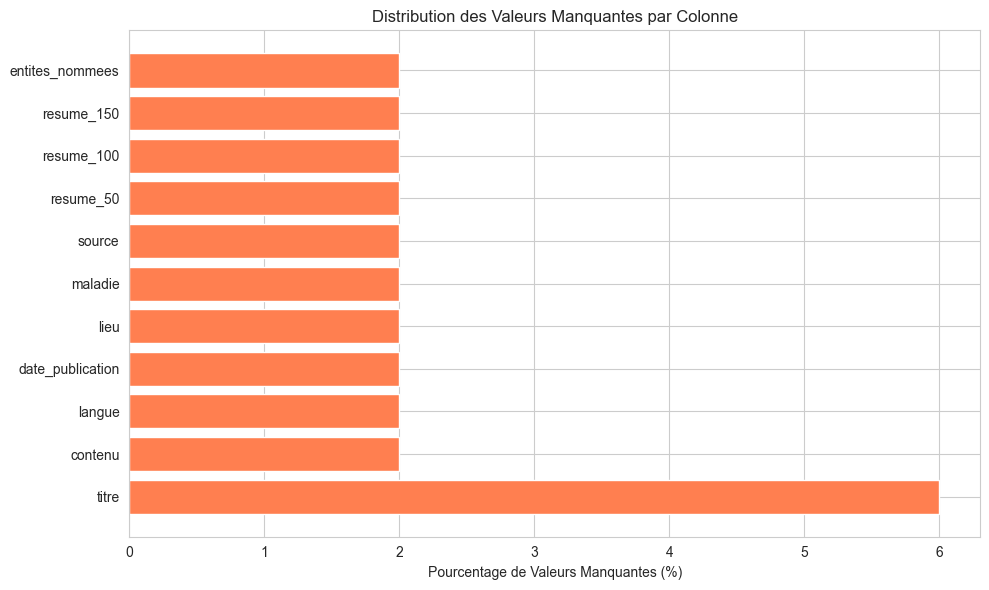

In [69]:
if not missing_data.empty:
    plt.figure(figsize=(10, 6))
    plt.barh(missing_data['Colonne'], missing_data['Pourcentage'], color='coral')
    plt.xlabel('Pourcentage de Valeurs Manquantes (%)')
    plt.title('Distribution des Valeurs Manquantes par Colonne')
    plt.tight_layout()
    plt.show()

### 3.2 Analyse du Statut de Scraping

In [70]:
status_dist = df_raw['status'].value_counts()
print("\n📊 DISTRIBUTION DES STATUTS DE SCRAPING:",status_dist)


📊 DISTRIBUTION DES STATUTS DE SCRAPING: status
succès             49
erreur: timeout     1
Name: count, dtype: int64


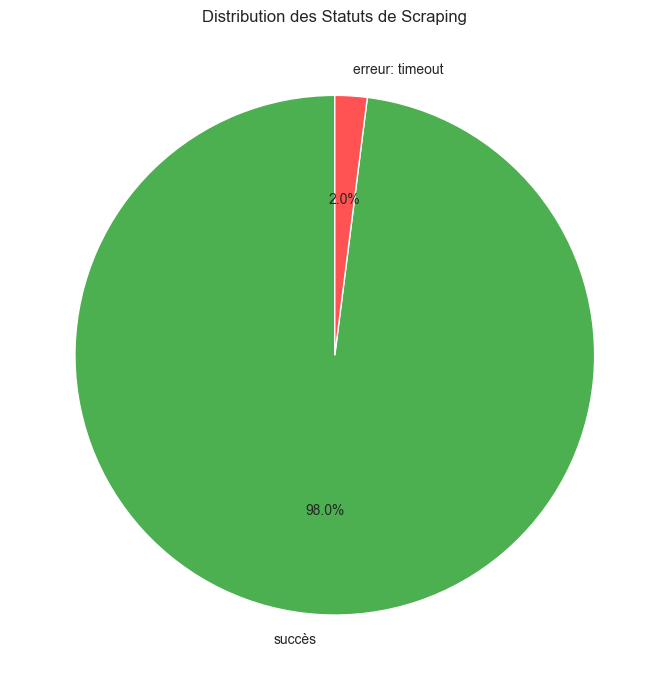

In [71]:
# Pie chart
fig, ax = plt.subplots(figsize=(7, 7))
status_dist.plot(kind='pie', ax=ax, autopct='%1.1f%%', startangle=90, colors=['#4CAF50', '#FF5252'])
ax.set_ylabel('')
ax.set_title('Distribution des Statuts de Scraping')
plt.tight_layout()
plt.show()

## 4. Prétraitement des Données

### 4.1 Nettoyage des Colonnes Textuelles

In [72]:
df_clean = df_raw.copy()

In [73]:
def clean_text(text):
    """Nettoie le texte en supprimant les espaces multiples et caractères spéciaux"""
    if pd.isna(text) or text == '':
        return text
    
    # Convertir en string si ce n'est pas le cas
    text = str(text)
    
    # Supprimer les espaces multiples
    text = re.sub(r'\s+', ' ', text)
    
    # Supprimer les espaces en début et fin
    text = text.strip()
    
    return text

# Appliquer le nettoyage sur les colonnes textuelles
text_columns = ['titre', 'contenu', 'resume_50', 'resume_100', 'resume_150', 'entites_nommees']

for col in text_columns:
    if col in df_clean.columns:
        df_clean[col] = df_clean[col].apply(clean_text)
        print(f"✅ Colonne '{col}' nettoyée")

✅ Colonne 'titre' nettoyée
✅ Colonne 'contenu' nettoyée
✅ Colonne 'resume_50' nettoyée
✅ Colonne 'resume_100' nettoyée
✅ Colonne 'resume_150' nettoyée
✅ Colonne 'entites_nommees' nettoyée


In [74]:
df_clean.head()

,code,url,titre,contenu,langue,nb_caracteres,nb_mots,date_publication,lieu,maladie,source,resume_50,resume_100,resume_150,entites_nommees,status
0,code1050,https://www.elkhabar.com/societe/%D8%A7%D9%84%D8%A8%D9%84%D9%8A%D8%AF%D8%A9-%D9%85%D8%B1%D8%B6-%...,البليدة: مرض غريب يقضي على الأبقار,الخبر 18/06/2024 - 11:41 البليدة: مرض غريب يقضي على الأبقار عاش مربو الأبقار الحلوب بوجه خاص، با...,arabe,952,161,18/06/2024,non spécifié,non identifié,autre,الخبر 18/06/2024 - 11:41 البليدة: مرض غريب يقضي على الأبقار عاش مربو الأبقار الحلوب بوجه خاص، با...,الخبر 18/06/2024 - 11:41 البليدة: مرض غريب يقضي على الأبقار عاش مربو الأبقار الحلوب بوجه خاص، با...,الخبر 18/06/2024 - 11:41 البليدة: مرض غريب يقضي على الأبقار عاش مربو الأبقار الحلوب بوجه خاص، با...,أبقار,succès
1,code1051,https://www.mystateline.com/news/local-news/west-nile-virus-detected-in-winnebago-county/,Access to this page has been denied,Your browser appears to have Javascript disabled. For instructions on how to enable Javascript p...,anglais,191,28,non trouvé,non spécifié,non identifié,médias,Your browser appears to have Javascript disabled. For instructions on how to enable Javascript p...,Your browser appears to have Javascript disabled. For instructions on how to enable Javascript p...,Your browser appears to have Javascript disabled. For instructions on how to enable Javascript p...,aucune,succès
2,code1052,https://www.wattagnet.com/poultry-meat/diseases-health/avian-influenza/article/15677890/more-min...,More Minnesota turkeys struck by avian influenza,BROILERS & TURKEYS DISEASES & HEALTH AVIAN INFLUENZA More Minnesota turkeys struck by avian infl...,anglais,2474,406,non trouvé,non spécifié,rage,autre,BROILERS & TURKEYS DISEASES & HEALTH AVIAN INFLUENZA More Minnesota turkeys struck by avian infl...,BROILERS & TURKEYS DISEASES & HEALTH AVIAN INFLUENZA More Minnesota turkeys struck by avian infl...,BROILERS & TURKEYS DISEASES & HEALTH AVIAN INFLUENZA More Minnesota turkeys struck by avian infl...,poultry; WOAH says AVIAN,succès
3,code1053,https://thehorse.com/1128529/2-california-horses-positive-for-ehm/,2 California Horses Positive for EHM,"Skip to content 2 California Horses Positive for EHM June 18, 2024 Posted by Edited Press Releas...",anglais,9257,1372,18-06-2024,France,non identifié,autre,"Skip to content 2 California Horses Positive for EHM June 18, 2024 Posted by Edited Press Releas...","Skip to content 2 California Horses Positive for EHM June 18, 2024 Posted by Edited Press Releas...","Skip to content 2 California Horses Positive for EHM June 18, 2024 Posted by Edited Press Releas...",equipment of people who have recently had; horse,succès
4,code1054,https://urls.fr/BRHFco,نفوق الأبقار في عمروسة .. المفتش البيطري بالبليدة يكشف السبب,الوطني نفوق الأبقار في عمروسة .. المفتش البيطري بالبليدة يكشف السبب بقلم م. فيصل نشر في 19 جوان ...,arabe,1190,196,19-06-2024,non spécifié,non identifié,autre,الوطني نفوق الأبقار في عمروسة .. المفتش البيطري بالبليدة يكشف السبب بقلم م. فيصل نشر في 19 جوان ...,الوطني نفوق الأبقار في عمروسة .. المفتش البيطري بالبليدة يكشف السبب بقلم م. فيصل نشر في 19 جوان ...,الوطني نفوق الأبقار في عمروسة .. المفتش البيطري بالبليدة يكشف السبب بقلم م. فيصل نشر في 19 جوان ...,أبقار,succès


### 4.2 Traitement des Dates

In [75]:
# Convertir les dates au format datetime
df_clean['date_publication'] = pd.to_datetime(
    df_clean['date_publication'], 
    format='%d-%m-%Y', 
    errors='coerce'
)

In [76]:
# Extraire des informations temporelles
df_clean['annee'] = df_clean['date_publication'].dt.year
df_clean['mois'] = df_clean['date_publication'].dt.month
df_clean['jour'] = df_clean['date_publication'].dt.day
df_clean['jour_semaine'] = df_clean['date_publication'].dt.day_name()
df_clean['trimestre'] = df_clean['date_publication'].dt.quarter

In [77]:
# Créer une colonne mois-année pour les analyses temporelles
df_clean['mois_annee'] = df_clean['date_publication'].dt.to_period('M').astype(str)

In [78]:
print("✅ Traitement des dates terminé")
print(f"   - Dates valides: {df_clean['date_publication'].notna().sum()}")
print(f"   - Dates manquantes: {df_clean['date_publication'].isna().sum()}")

✅ Traitement des dates terminé
   - Dates valides: 23
   - Dates manquantes: 27


### 4.3 Normalisation des Catégories

In [79]:
# Normaliser les lieux
def normalize_location(location):
    """Normalise les noms de lieux"""
    if pd.isna(location) or location == 'non spécifié':
        return 'Non spécifié'
    
    location = str(location).strip().title()
    
    # Mapper les variantes communes
    location_mapping = {
        'Tunisia': 'Tunisie',
        'Morocco': 'Maroc',
        'Algeria': 'Algérie',
        'Egypt': 'Égypte'
    }
    
    return location_mapping.get(location, location)

df_clean['lieu'] = df_clean['lieu'].apply(normalize_location)

In [80]:
# Normaliser les maladies
def normalize_disease(disease):
    """Normalise les noms de maladies"""
    if pd.isna(disease) or disease == 'non identifié':
        return 'Non identifié'
    
    disease = str(disease).strip().lower()
    
    # Mapper les variantes communes
    disease_mapping = {
        'avian flu': 'grippe aviaire',
        'foot and mouth': 'fièvre aphteuse',
        'الحمى القلاعية': 'fièvre aphteuse',
        'أنفلونزا الطيور': 'grippe aviaire',
        'داء الكلب': 'rage'
    }
    
    return disease_mapping.get(disease, disease.title())

df_clean['maladie'] = df_clean['maladie'].apply(normalize_disease)

In [81]:
# Normaliser les langues
df_clean['langue'] = df_clean['langue'].str.capitalize()

In [82]:
df_clean = df_clean.sort_values(by='langue', ascending=True)

In [83]:
df_clean.head()

,code,url,titre,contenu,langue,nb_caracteres,nb_mots,date_publication,lieu,maladie,source,resume_50,resume_100,resume_150,entites_nommees,status,annee,mois,jour,jour_semaine,trimestre,mois_annee
31,code1081,https://www.dakotanewsnow.com/2024/06/27/west-nile-detected-brookings-county/,West Nile detected in Brookings County,West Nile detected in Brookings County Subscribe to the Dakota News Now YouTube channel By Dakot...,Anglais,1486,231,2024-06-27,Non spécifié,Non identifié,médias,West Nile detected in Brookings County Subscribe to the Dakota News Now YouTube channel By Dakot...,West Nile detected in Brookings County Subscribe to the Dakota News Now YouTube channel By Dakot...,West Nile detected in Brookings County Subscribe to the Dakota News Now YouTube channel By Dakot...,Symptoms of West Nile; People with symptoms like severe or,succès,2024.0,6.0,27.0,Thursday,2.0,2024-06
16,code1066,https://www.rudaw.net/english/middleeast/iraq/240620241,Dhi Qar leads Iraq in Congo fever cases this year,Rudaw SHARE ON SHARE ON FACEBOOK SHARE ON TWITTER SHARE ON WHATSAPP SHARE ON TELEGRAM SHARE ON V...,Anglais,2595,410,NaT,Non spécifié,Rage,autre,Rudaw SHARE ON SHARE ON FACEBOOK SHARE ON TWITTER SHARE ON WHATSAPP SHARE ON TELEGRAM SHARE ON V...,Rudaw SHARE ON SHARE ON FACEBOOK SHARE ON TWITTER SHARE ON WHATSAPP SHARE ON TELEGRAM SHARE ON V...,Rudaw SHARE ON SHARE ON FACEBOOK SHARE ON TWITTER SHARE ON WHATSAPP SHARE ON TELEGRAM SHARE ON V...,Transport ministry Basra police; WHO; Some symptoms of the fever,succès,NaN,NaN,NaN,NaN,NaN,NaT
14,code1064,https://www.news.com.au/national/nsw-act/news/bird-flu-detected-at-second-sydney-hawkesbury-egg-...,Bird flu detected at second Sydney Hawkesbury poultry farm,Bird flu detected at second Sydney Hawkesbury poultry farm The highly contagious and deadly stra...,Anglais,2750,453,2024-06-22,Non spécifié,Rage,médias,Bird flu detected at second Sydney Hawkesbury poultry farm The highly contagious and deadly stra...,Bird flu detected at second Sydney Hawkesbury poultry farm The highly contagious and deadly stra...,Bird flu detected at second Sydney Hawkesbury poultry farm The highly contagious and deadly stra...,poultry; chicken; s Australian Centre for Disease,succès,2024.0,6.0,22.0,Saturday,2.0,2024-06
33,code1083,https://equimanagement.com/news/edcc-health-watch/quebec-mare-positive-for-salmonellosis/,Quebec Mare Positive for Salmonellosis - EquiManagement,Skip to content Home / News / EDCC Health Watch / Quebec Mare Positive for Salmonellosis Quebec ...,Anglais,9541,1388,2024-06-27,France,Non identifié,médias,Skip to content Home / News / EDCC Health Watch / Quebec Mare Positive for Salmonellosis Quebec ...,Skip to content Home / News / EDCC Health Watch / Quebec Mare Positive for Salmonellosis Quebec ...,Skip to content Home / News / EDCC Health Watch / Quebec Mare Positive for Salmonellosis Quebec ...,horse,succès,2024.0,6.0,27.0,Thursday,2.0,2024-06
48,code1098,https://www.kbtx.com/2024/07/02/brazos-county-confirms-west-nile-virus-detected-area/,Brazos County confirms West Nile Virus detected in the area,Brazos County confirms West Nile Virus detected in the area The mosquito trap that collected the...,Anglais,2569,404,2024-07-02,Non spécifié,Non identifié,autre,Brazos County confirms West Nile Virus detected in the area The mosquito trap that collected the...,Brazos County confirms West Nile Virus detected in the area The mosquito trap that collected the...,Brazos County confirms West Nile Virus detected in the area The mosquito trap that collected the...,develop symptoms like headache,succès,2024.0,7.0,2.0,Tuesday,3.0,2024-07


 ### 5.1 Distribution des Variables Catégorielles

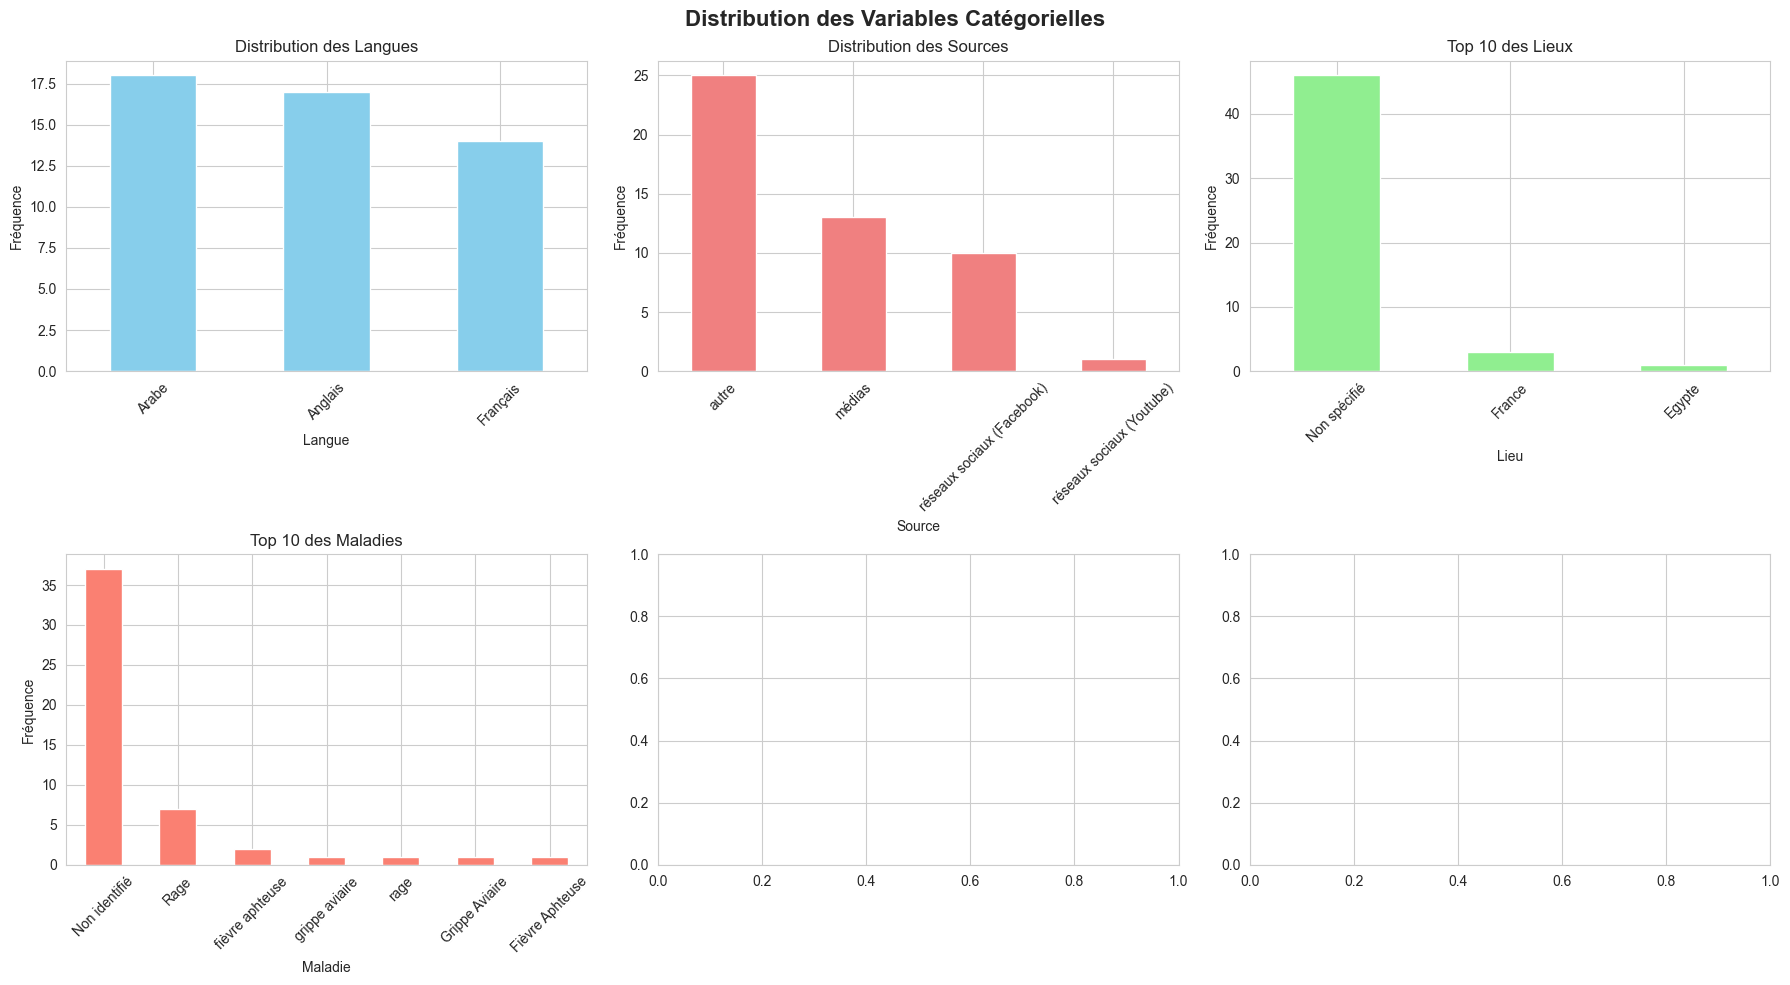

In [85]:
# Créer des graphiques pour les principales variables catégorielles
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Distribution des Variables Catégorielles', fontsize=16, fontweight='bold')

# Langues
df_clean['langue'].value_counts().head(10).plot(kind='bar', ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Distribution des Langues')
axes[0, 0].set_xlabel('Langue')
axes[0, 0].set_ylabel('Fréquence')
axes[0, 0].tick_params(axis='x', rotation=45)

# Sources
df_clean['source'].value_counts().plot(kind='bar', ax=axes[0, 1], color='lightcoral')
axes[0, 1].set_title('Distribution des Sources')
axes[0, 1].set_xlabel('Source')
axes[0, 1].set_ylabel('Fréquence')
axes[0, 1].tick_params(axis='x', rotation=45)

# Lieux
df_clean['lieu'].value_counts().head(10).plot(kind='bar', ax=axes[0, 2], color='lightgreen')
axes[0, 2].set_title('Top 10 des Lieux')
axes[0, 2].set_xlabel('Lieu')
axes[0, 2].set_ylabel('Fréquence')
axes[0, 2].tick_params(axis='x', rotation=45)

# Maladies
df_clean['maladie'].value_counts().head(10).plot(kind='bar', ax=axes[1, 0], color='salmon')
axes[1, 0].set_title('Top 10 des Maladies')
axes[1, 0].set_xlabel('Maladie')
axes[1, 0].set_ylabel('Fréquence')
axes[1, 0].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [86]:
drop_indices = df_clean[df_raw['status'] != 'succès'].index
df_clean = df_clean.drop(drop_indices).reset_index(drop=True)
df_clean.drop(columns=['status'], inplace=True)

In [87]:
df_clean = df_clean.sort_values(by='langue', ascending=True)

In [88]:
df_clean.head()

,code,url,titre,contenu,langue,nb_caracteres,nb_mots,date_publication,lieu,maladie,source,resume_50,resume_100,resume_150,entites_nommees,annee,mois,jour,jour_semaine,trimestre,mois_annee
0,code1081,https://www.dakotanewsnow.com/2024/06/27/west-nile-detected-brookings-county/,West Nile detected in Brookings County,West Nile detected in Brookings County Subscribe to the Dakota News Now YouTube channel By Dakot...,Anglais,1486,231,2024-06-27,Non spécifié,Non identifié,médias,West Nile detected in Brookings County Subscribe to the Dakota News Now YouTube channel By Dakot...,West Nile detected in Brookings County Subscribe to the Dakota News Now YouTube channel By Dakot...,West Nile detected in Brookings County Subscribe to the Dakota News Now YouTube channel By Dakot...,Symptoms of West Nile; People with symptoms like severe or,2024.0,6.0,27.0,Thursday,2.0,2024-06
16,code1058,https://www.cidrap.umn.edu/avian-influenza-bird-flu/china-reports-another-fatal-h5n6-avian-flu-case,China reports another fatal H5N6 avian flu case,"China reports another fatal H5N6 avian flu case News brief June 20, 2024 Lisa Schnirring Topics ...",Anglais,12295,1841,2024-06-20,Non spécifié,Rage,autre,"China reports another fatal H5N6 avian flu case News brief June 20, 2024 Lisa Schnirring Topics ...","China reports another fatal H5N6 avian flu case News brief June 20, 2024 Lisa Schnirring Topics ...","China reports another fatal H5N6 avian flu case News brief June 20, 2024 Lisa Schnirring Topics ...",whose symptoms began on May 8; poultry; s southeast whose symptoms began on; WHO,2024.0,6.0,20.0,Thursday,2.0,2024-06
15,code1051,https://www.mystateline.com/news/local-news/west-nile-virus-detected-in-winnebago-county/,Access to this page has been denied,Your browser appears to have Javascript disabled. For instructions on how to enable Javascript p...,Anglais,191,28,NaT,Non spécifié,Non identifié,médias,Your browser appears to have Javascript disabled. For instructions on how to enable Javascript p...,Your browser appears to have Javascript disabled. For instructions on how to enable Javascript p...,Your browser appears to have Javascript disabled. For instructions on how to enable Javascript p...,aucune,NaN,NaN,NaN,NaN,NaN,NaT
14,code1052,https://www.wattagnet.com/poultry-meat/diseases-health/avian-influenza/article/15677890/more-min...,More Minnesota turkeys struck by avian influenza,BROILERS & TURKEYS DISEASES & HEALTH AVIAN INFLUENZA More Minnesota turkeys struck by avian infl...,Anglais,2474,406,NaT,Non spécifié,Rage,autre,BROILERS & TURKEYS DISEASES & HEALTH AVIAN INFLUENZA More Minnesota turkeys struck by avian infl...,BROILERS & TURKEYS DISEASES & HEALTH AVIAN INFLUENZA More Minnesota turkeys struck by avian infl...,BROILERS & TURKEYS DISEASES & HEALTH AVIAN INFLUENZA More Minnesota turkeys struck by avian infl...,poultry; WOAH says AVIAN,NaN,NaN,NaN,NaN,NaN,NaT
13,code1053,https://thehorse.com/1128529/2-california-horses-positive-for-ehm/,2 California Horses Positive for EHM,"Skip to content 2 California Horses Positive for EHM June 18, 2024 Posted by Edited Press Releas...",Anglais,9257,1372,2024-06-18,France,Non identifié,autre,"Skip to content 2 California Horses Positive for EHM June 18, 2024 Posted by Edited Press Releas...","Skip to content 2 California Horses Positive for EHM June 18, 2024 Posted by Edited Press Releas...","Skip to content 2 California Horses Positive for EHM June 18, 2024 Posted by Edited Press Releas...",equipment of people who have recently had; horse,2024.0,6.0,18.0,Tuesday,2.0,2024-06
